# LittleVGG
          Vom pregăti acest lucru în setul de date al caracterelor Simpson

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator 
import os

#parametri de instruire
num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = 'c:/Users/Harum/Documents/16/simpsons/train'
validation_data_dir = 'c:/Users/Harum/Documents/16/simpsons/validation'

#folosim cateva data augmentaiton
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    class_mode='categorical'
)    

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


# Crem modelul LittleVGG

In [8]:
model = Sequential()

#Primul strat Conv-ReLU
model.add(Conv2D(64, (5,5), padding= 'same', input_shape=(img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Al 2-lea strat Conv-ReLU
model.add(Conv2D(64,(5,5), padding= "same", input_shape=(img_rows, img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max Pooling cu Dropout
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#Al 3-lea strad Conv-ReLU
model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Al 4-lea strat Conv-ReLu
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Max Pooling cu Dropout
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#Al 5-lea strat Conv-ReLU
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#Al 6-lea strat Conv-ReLU
model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())

#Max Pooling cu Dropout
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

#Primul set De FC ori Dense
model.add(Flatten()) 
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Al 2-lea FC ori Dense
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Ultimul Strat Dense
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)       

# Sa ne uitam la modelul nostru

In [9]:
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mping
import numpy as np

"""plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)
img = mping.imread('LittleVGG.png')
plt.figure(figsize=(100,70))
imgplot = plt.imshow(img)"""

"plot_model(model, to_file='LittleVGG.png', show_shapes=True, show_layer_names=True)\nimg = mping.imread('LittleVGG.png')\nplt.figure(figsize=(100,70))\nimgplot = plt.imshow(img)"

# Instruirea modelului LittleVGG

In [10]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("c:/Users/Harum/Documents/16/simpsons_little_vgg.h5",
                            monitor='val_loss',
                            mode="min",
                            save_best_only= True,
                            verbose=1
                            )

earlystop = EarlyStopping(monitor='val_loss', 
                          min_delta=0,
                          patience= 3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.00001
)

#punem call backs intr-o lista callback
callbacks = [earlystop, checkpoint, reduce_lr]

#Utilizam o rata de invatare foarte mica
model.compile(Adam(0.01),'categorical_crossentropy', ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - 212s 174ms/step - loss: 2.7977 - accuracy: 0.1642 - val_loss: 2.8803 - val_accuracy: 0.0943

Epoch 00001: val_loss improved from inf to 2.88033, saving model to c:/Users/Harum/Documents/16/simpsons_little_vgg.h5
Epoch 2/10
1221/1221 [==============================] - 49s 40ms/step - loss: 2.3706 - accuracy: 0.2749 - val_loss: 2.9996 - val_accuracy: 0.3183

Epoch 00002: val_loss did not improve from 2.88033
Epoch 3/10
1221/1221 [==============================] - 48s 39ms/step - loss: 2.0567 - accuracy: 0.3797 - val_loss: 2.9765 - val_accuracy: 0.4189

Epoch 00003: val_loss did not improve from 2.88033
Epoch 4/10
1221/1221 [==============================] - 47s 38ms/step - loss: 1.8594 - accuracy: 0.4473 - val_loss: 1.6085 - val_accuracy: 0.5092

Epoch 00004: val_loss improved from 2.88033 to 1.60853, saving model to c:/Users/Harum/Documents/16/simpsons_little_vgg.h5
Epoch 5/10
1221/1221 [==============================] - 50s 41ms/s

Found 990 images belonging to 20 classes.
Confusion Matrix
[[31  0  0  0  0  0  0 15  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0 33  0  1  3  3  4  0  0  1  2  1  0  0  0  0  2  0  0]
 [ 1  0  0 36  5  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 2  0  0  0  5 33  0  2  0  2  0  0  2  0  0  1  0  2  0  0]
 [ 0  0  0  0  0  0 42  3  0  0  0  0  1  0  0  0  4  0  0  0]
 [ 0  0  0  1  0  0  0 48  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 41  1  0  0  6  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  1  1  0 46  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  6  0  0 38  0  0  0  0  0  4  0  0  1]
 [ 1  0  8  1  0  1  0 13  0  0  1 19  2  0  0  1  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0]
 [ 2  0  0  1  3  2  1  6  0  0  0  0  0 16  0 15  2  1  0  1]
 [ 0  1  0  0  0  0  0  2  0  0  0  0  2  0 43  1  0  0  0 

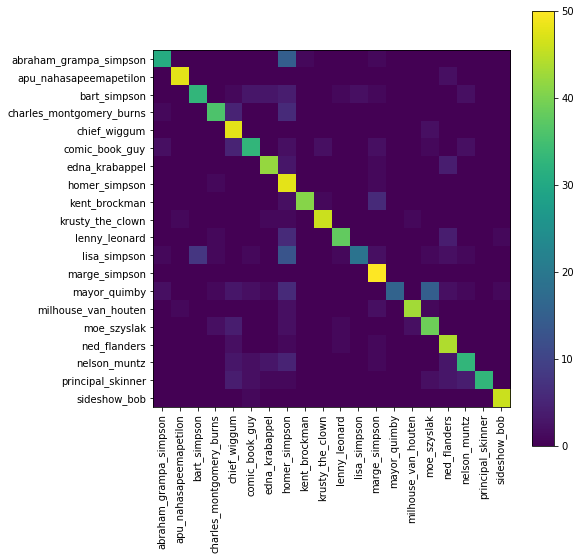

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#ne trebuie sa recream validation generator cu shuffle = Fals
validation_generator = validation_datagen.flow_from_directory(
                         validation_data_dir,
                         target_size=(img_rows, img_cols),
                         batch_size=batch_size,
                         class_mode='categorical',
                         shuffle=False
                         )

class_labels = validation_generator.class_indices
class_labels = {v: k for k,v in class_labels.items() }
classes= list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print("Confusion Matrix")
print(confusion_matrix(validation_generator.classes, y_pred))
print("Classification Raport")
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [12]:
from keras.models import load_model

#78% Acuratete dupa doar 10 epochs
classifier = load_model("c:/Users/Harum/Documents/16/simpsons_little_vgg.h5")

In [25]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0,0,300, cv2.BORDER_CONSTANT, value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255),2)
    cv2.putText(expanded_image, "true -"+ true_label, (20,120), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)

def getRandomImage(path, img_width, img_height):

    folders = list(filter(lambda x : os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0, len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    
    random_file_index=np.random.randint(0, len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" +image_name
    return image.load_img(final_path, target_size=(img_width, img_height)),final_path, path_class

#dimensiunea imagini
img_width , img_height = 32, 32
    
     

files = []
predictions = []
true_labels = []

    #predictie imaginii
for i in range(0,10):
        path = 'c:/Users/Harum/Documents/16/simpsons/validation/'
        img, final_path, true_label = getRandomImage(path, img_width, img_height)
        files.append(final_path)
        true_labels.append(true_label)
        x = image.img_to_array(img)
        x = x*1./255
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = classifier.predict_classes(images, batch_size=10)
        predictions.append(classes)

for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation= cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()    
